In [1]:
import os
import tarfile
from six.moves import urllib
import pandas as pd

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    fetch_housing_data()  # Fetch and extract the data if it doesn't exist
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()


In [192]:
# EDA Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sampling Library
from sklearn.model_selection import train_test_split

# Data Transformation Libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Custom Transformation 
from sklearn.base import BaseEstimator, TransformerMixin

# Data Pipelines 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 

# Machine Learning Models and Evaluation Metrices
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Custom Evaluation Metric
def rmse(y, y_hat):
    return np.sqrt(mean_squared_error(y, y_hat))

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
housing.shape

(20640, 10)

In [4]:
housing["ocean_proximity"].nunique()

5

In [5]:
housing["total_bedrooms"].nunique()

1923

In [6]:
housing["households"].nunique()

1815

In [8]:
housing["total_rooms"].nunique()

5926

In [9]:
housing["housing_median_age"].nunique()

52

In [10]:
housing.shape[0]*0.2

4128.0

In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
X=housing.drop("median_house_value",axis=1)
y=housing["median_house_value"]

In [5]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [6]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

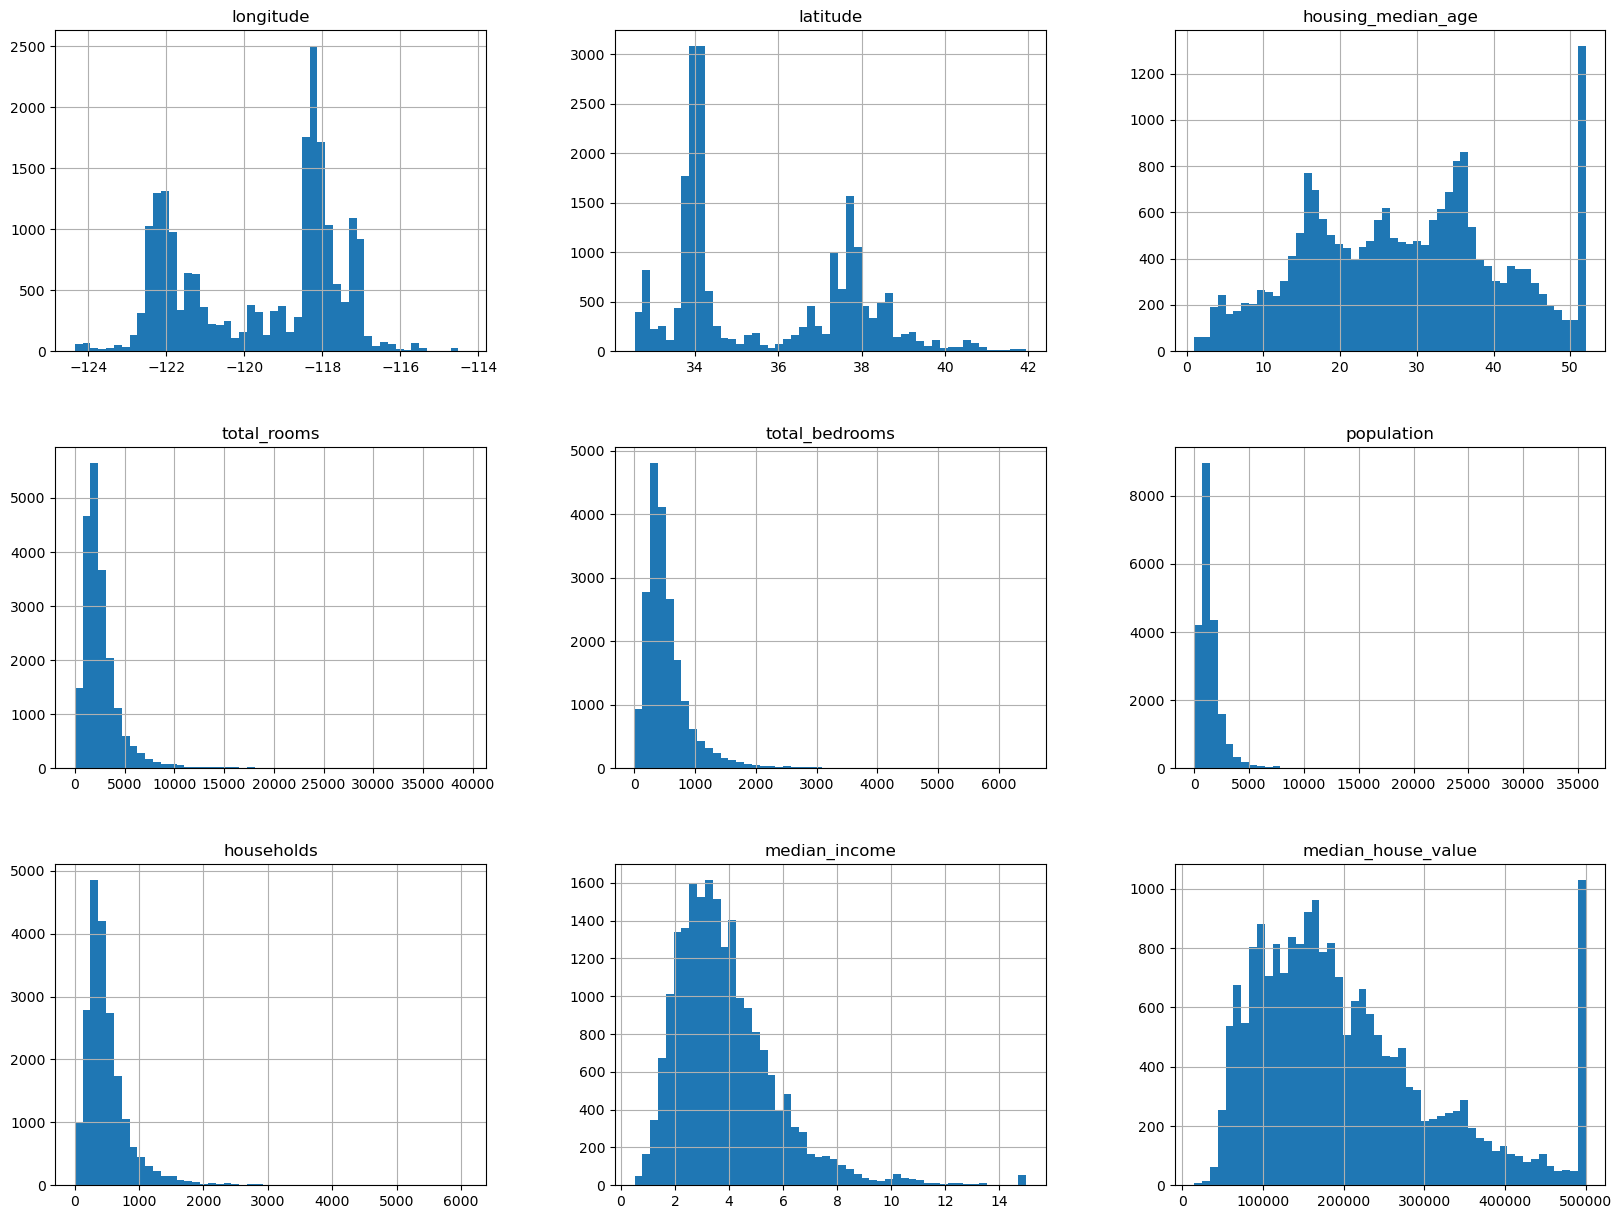

In [7]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

## Splitting the data

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [9]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13240,-117.67,34.12,15.0,3162.0,495.0,1145.0,473.0,5.3525,INLAND
12586,-121.50,38.53,37.0,3642.0,684.0,1508.0,657.0,3.5231,INLAND
13123,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND
15456,-117.28,33.18,16.0,3002.0,591.0,842.0,538.0,2.1205,NEAR OCEAN
19798,-123.12,40.54,23.0,1091.0,217.0,539.0,201.0,1.8696,INLAND


In [10]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
3046,-119.28,35.50,34.0,1923.0,379.0,1101.0,351.0,2.4044,INLAND
6803,-118.13,34.08,40.0,1931.0,449.0,1367.0,446.0,2.5750,<1H OCEAN
10112,-117.94,33.94,30.0,1596.0,307.0,845.0,309.0,4.5096,<1H OCEAN
3126,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.3750,INLAND
5008,-118.33,34.01,47.0,1320.0,259.0,653.0,291.0,3.7727,<1H OCEAN


In [11]:
y_train.head()

13240    191700.0
12586    114300.0
13123    144600.0
15456    157300.0
19798     61500.0
Name: median_house_value, dtype: float64

In [12]:
y_test.head()

3046      65800.0
6803     228400.0
10112    241100.0
3126     137500.0
5008     193000.0
Name: median_house_value, dtype: float64

In [16]:
#num_features=["longitude","latitude","total_rooms","total_bedrooms","population","households","median_income","housing_median_age"]
#ordinal_features=["housing_median_age"]
#nominal_features=["ocean_proximity"]

## EDA on training set

In [17]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


features which have high corelation
1.total_bedrooms vs total_rooms
2.population vs total_rooms
3.households vs total_rooms
4.total_bedrooms vs population
5.total_bedrooms vs households
6.households vs population
7.population vs households
total_bedroom vs total_rooms vs population vs households

In [18]:
housing["bedroom_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]

In [19]:
housing["popuhouse"]=housing["households"]/housing["population"]

In [20]:
housing["poprooms"]=housing["total_rooms"]/housing["population"]

In [23]:
#housing.drop("sum",axis=1)

In [21]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_per_room,popuhouse,poprooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.146591,0.391304,2.732919
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.155797,0.473969,2.956685
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.129516,0.356855,2.957661
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.184458,0.392473,2.283154
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.172096,0.458407,2.879646


array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

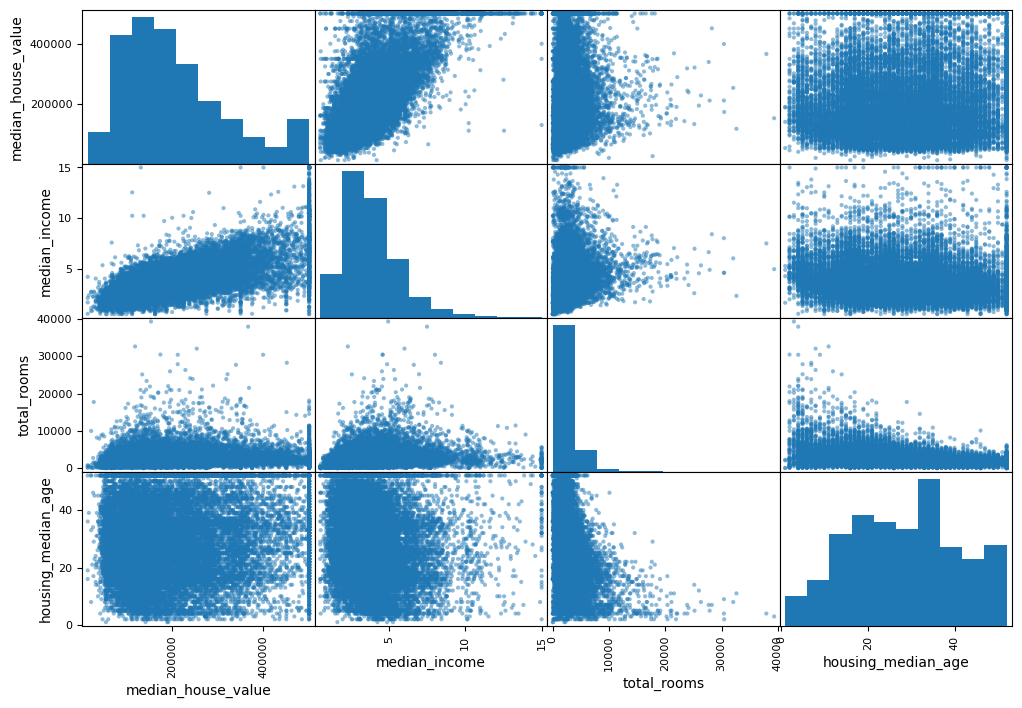

In [37]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

In [22]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedroom_per_room,popuhouse,poprooms
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,0.092657,-0.141350,-0.074420
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,-0.113815,0.122488,0.140345
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.136089,0.023128,-0.107926
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.187900,0.073706,0.129274
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.084238,0.151269,0.056592
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,0.035319,-0.186292,-0.140520
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,0.065087,0.128603,-0.028473
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,-0.615661,-0.008930,0.237828
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,-0.255880,0.264910,0.209482
bedroom_per_room,0.092657,-0.113815,0.136089,-0.187900,0.084238,0.035319,0.065087,-0.615661,-0.255880,1.000000,0.130062,-0.272597


In [23]:
r=corr_matrix["median_house_value"].sort_values(ascending=False)
r

median_house_value    1.000000
median_income         0.688075
popuhouse             0.264910
poprooms              0.209482
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedroom_per_room     -0.255880
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

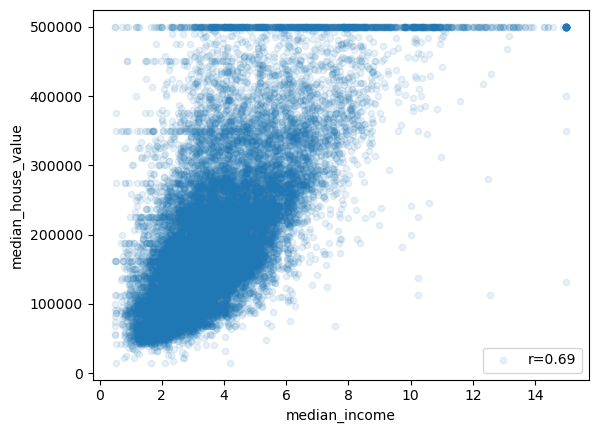

In [33]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",label=f"r={r[1]:.2f}",alpha=0.1)

<AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>

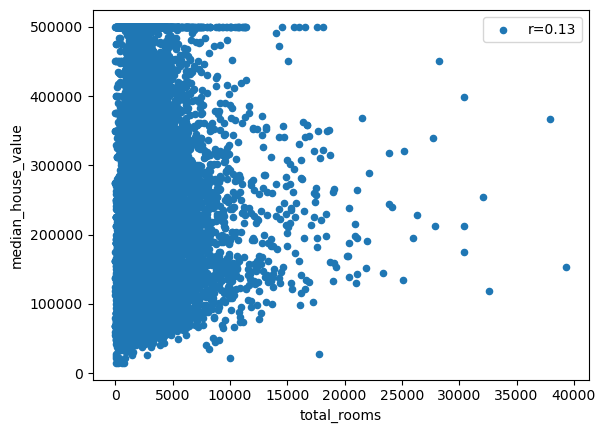

In [28]:
housing.plot(kind="scatter",x="total_rooms",y="median_house_value",label=f"r={r[2]:.2f}")

<AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>

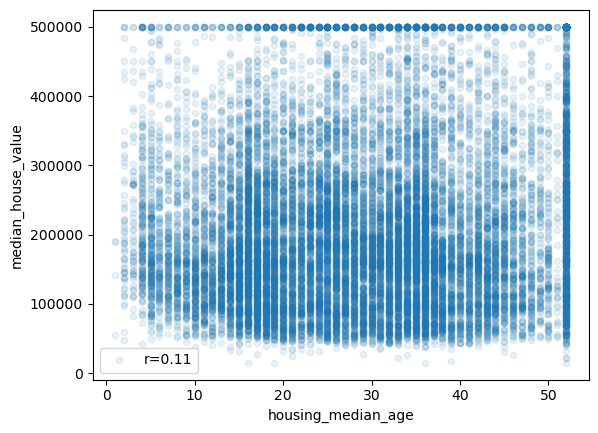

In [31]:
housing.plot(kind="scatter",x="housing_median_age",y="median_house_value",label=f"r={r[3]:.2f}",alpha=0.1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

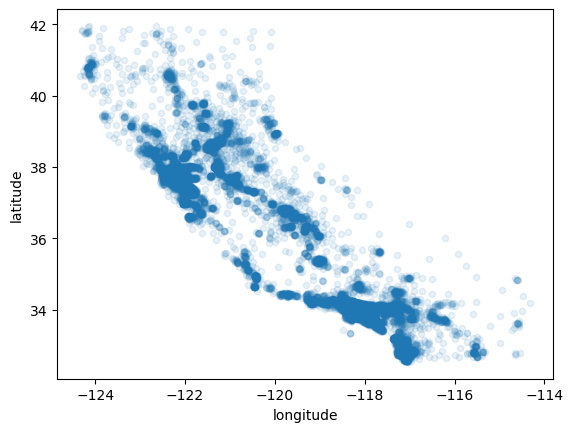

In [49]:
housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.1)

In [3]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [24]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
bedroom_per_room      207
popuhouse               0
poprooms                0
dtype: int64

## Pipeline

In [ ]:
'''from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):# no *args or **kargs
        return self
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        poprooms = X[:, rooms_ix] / X[:, population_ix]
        popuhouse =  X[:, households_ix]/X[:, population_ix]
        bedrooms_per_room=X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)'''

### Transforming

In [55]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13240,-117.67,34.12,15.0,3162.0,495.0,1145.0,473.0,5.3525,INLAND
12586,-121.50,38.53,37.0,3642.0,684.0,1508.0,657.0,3.5231,INLAND
13123,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND
15456,-117.28,33.18,16.0,3002.0,591.0,842.0,538.0,2.1205,NEAR OCEAN
19798,-123.12,40.54,23.0,1091.0,217.0,539.0,201.0,1.8696,INLAND


In [57]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
3046,-119.28,35.50,34.0,1923.0,379.0,1101.0,351.0,2.4044,INLAND
6803,-118.13,34.08,40.0,1931.0,449.0,1367.0,446.0,2.5750,<1H OCEAN
10112,-117.94,33.94,30.0,1596.0,307.0,845.0,309.0,4.5096,<1H OCEAN
3126,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.3750,INLAND
5008,-118.33,34.01,47.0,1320.0,259.0,653.0,291.0,3.7727,<1H OCEAN


In [58]:
X_train["bedroom_per_room"]=X_train["total_bedrooms"]/X_train["total_rooms"]
X_train["popuhouse"]=X_train["households"]/X_train["population"]
X_train["poprooms"]=X_train["total_rooms"]/X_train["population"]

In [61]:
X_test["bedroom_per_room"]=X_test["total_bedrooms"]/X_test["total_rooms"]
X_test["popuhouse"]=X_test["households"]/X_test["population"]
X_test["poprooms"]=X_test["total_rooms"]/X_test["population"]

In [59]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bedroom_per_room,popuhouse,poprooms
13240,-117.67,34.12,15.0,3162.0,495.0,1145.0,473.0,5.3525,INLAND,0.156546,0.413100,2.761572
12586,-121.50,38.53,37.0,3642.0,684.0,1508.0,657.0,3.5231,INLAND,0.187809,0.435676,2.415119
13123,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,0.174277,0.307584,1.845506
15456,-117.28,33.18,16.0,3002.0,591.0,842.0,538.0,2.1205,NEAR OCEAN,0.196869,0.638955,3.565321
19798,-123.12,40.54,23.0,1091.0,217.0,539.0,201.0,1.8696,INLAND,0.198900,0.372913,2.024119


In [62]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bedroom_per_room,popuhouse,poprooms
3046,-119.28,35.50,34.0,1923.0,379.0,1101.0,351.0,2.4044,INLAND,0.197088,0.318801,1.746594
6803,-118.13,34.08,40.0,1931.0,449.0,1367.0,446.0,2.5750,<1H OCEAN,0.232522,0.326262,1.412582
10112,-117.94,33.94,30.0,1596.0,307.0,845.0,309.0,4.5096,<1H OCEAN,0.192356,0.365680,1.888757
3126,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.3750,INLAND,1.000000,0.333333,0.333333
5008,-118.33,34.01,47.0,1320.0,259.0,653.0,291.0,3.7727,<1H OCEAN,0.196212,0.445636,2.021440


In [63]:
numerical_pipeline=Pipeline([("Simple Imputer",SimpleImputer()),("Standard Scaler",StandardScaler())])
nominal_pipeline=Pipeline([("One hot encoder",OneHotEncoder())])

In [67]:
housing["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [178]:
num_features=["longitude","latitude","total_rooms","population","households","median_income","housing_median_age","bedroom_per_room","popuhouse","poprooms"]
#ordinal_features=["housing_median_age"]
nominal_features=["ocean_proximity"]
drop_cols = ["total_bedrooms"]
#"longitude","latitude","total_rooms","total_bedrooms","population","households","median_income","housing_median_age","bedroom_per_room","popuhouse","poprooms"

In [179]:
pipeline = ColumnTransformer([
    ("numerical pipeline", numerical_pipeline, num_features), #["longitude","latitude","total_rooms","total_bedrooms","population","households","median_income","housing_median_age","bedroom_per_room","popuhouse","poprooms"]
    ("nominal pipeline", nominal_pipeline, nominal_features), # ["ocean_proximity"]
    #("passing columns", "passthrough", pass_through_cols), # ["cylinders"]
    ("drop columns", "drop", drop_cols)# ["longitude","latitude"]
])
output_cols=["longitude","latitude","total_rooms","population","households","median_income",
             "housing_median_age","bedroom_per_room","popuhouse","poprooms",
             "<1H OCEAN","INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"]
#"longitude","latitude",

In [144]:
X_train.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bedroom_per_room,popuhouse,poprooms
13240,-117.67,34.12,15.0,3162.0,495.0,1145.0,473.0,5.3525,INLAND,0.156546,0.413100,2.761572
12586,-121.50,38.53,37.0,3642.0,684.0,1508.0,657.0,3.5231,INLAND,0.187809,0.435676,2.415119
13123,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,0.174277,0.307584,1.845506
15456,-117.28,33.18,16.0,3002.0,591.0,842.0,538.0,2.1205,NEAR OCEAN,0.196869,0.638955,3.565321
19798,-123.12,40.54,23.0,1091.0,217.0,539.0,201.0,1.8696,INLAND,0.198900,0.372913,2.024119
14280,-117.13,32.71,42.0,1145.0,314.0,1114.0,307.0,1.2614,NEAR OCEAN,0.274236,0.275583,1.027828
8680,-118.33,33.88,36.0,1271.0,346.0,811.0,345.0,3.2417,<1H OCEAN,0.272227,0.425401,1.567201
5314,-118.42,34.06,40.0,2933.0,565.0,1077.0,536.0,6.1527,<1H OCEAN,0.192636,0.497679,2.723305
5172,-118.28,33.95,41.0,835.0,208.0,707.0,192.0,1.4103,<1H OCEAN,0.249102,0.271570,1.181047
8926,-118.48,34.00,41.0,2584.0,743.0,1058.0,668.0,3.2061,<1H OCEAN,0.287539,0.631380,2.442344


In [180]:
X_train_tr = pipeline.fit_transform(X_train)
X_train_tr = pd.DataFrame(X_train_tr, columns=output_cols)
X_train_tr.head(2)

,longitude,latitude,total_rooms,population,households,median_income,housing_median_age,bedroom_per_room,popuhouse,poprooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.943824,-0.704828,0.240758,-0.250026,-0.068377,0.780490,-1.086181,-0.984894,0.522166,0.656310,0.0,1.0,0.0,0.0,0.0
1,-0.968715,1.359545,0.459582,0.077362,0.413777,-0.179806,0.660456,-0.441629,0.764622,0.365252,0.0,1.0,0.0,0.0,0.0


In [146]:
X_train.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bedroom_per_room,popuhouse,poprooms
13240,-117.67,34.12,15.0,3162.0,495.0,1145.0,473.0,5.3525,INLAND,0.156546,0.413100,2.761572
12586,-121.50,38.53,37.0,3642.0,684.0,1508.0,657.0,3.5231,INLAND,0.187809,0.435676,2.415119


In [147]:
X_test.tail(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bedroom_per_room,popuhouse,poprooms
2499,-120.39,36.78,11.0,1947.0,488.0,2104.0,486.0,1.7184,INLAND,0.250642,0.230989,0.925380
19408,-120.91,37.73,31.0,840.0,154.0,429.0,150.0,2.4063,INLAND,0.183333,0.349650,1.958042


In [181]:
X_test_tr = pipeline.transform(X_test)
X_test_tr = pd.DataFrame(X_test_tr, columns=output_cols)
X_test_tr.tail(2)

,longitude,latitude,total_rooms,population,households,median_income,housing_median_age,bedroom_per_room,popuhouse,poprooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4126,-0.414429,0.540349,-0.313140,0.614891,-0.034311,-1.127137,-1.403752,0.650260,-1.433634,-0.886292,0.0,1.0,0.0,0.0,0.0
4127,-0.674095,0.985056,-0.817802,-0.895783,-0.914766,-0.766041,0.184100,-0.519403,-0.159260,-0.018743,0.0,1.0,0.0,0.0,0.0


In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [182]:
model1 = LinearRegression()
model2 = LinearRegression()

In [183]:
model1.fit(X_train_tr, y_train)
model2.fit(X_test_tr, y_test)

LinearRegression()

In [184]:
acc1 = r2_score(y_train, model1.predict(X_train_tr))
print(f"Accuracy of using Train data: {acc1*100:0.2f}")

Accuracy of using Train data: 67.82


In [185]:
acc2 = r2_score(y_test, model1.predict(X_test_tr))
print(f"Accuracy of using Test data: {acc2*100:0.2f}")

Accuracy of using Test data: 67.86


In [166]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedroom_per_room,popuhouse,poprooms
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,0.092657,-0.141350,-0.074420
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,-0.113815,0.122488,0.140345
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.136089,0.023128,-0.107926
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.187900,0.073706,0.129274
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.084238,0.151269,0.056592
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,0.035319,-0.186292,-0.140520
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,0.065087,0.128603,-0.028473
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,-0.615661,-0.008930,0.237828
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,-0.255880,0.264910,0.209482
bedroom_per_room,0.092657,-0.113815,0.136089,-0.187900,0.084238,0.035319,0.065087,-0.615661,-0.255880,1.000000,0.130062,-0.272597


In [104]:
r=corr_matrix["median_house_value"].sort_values(ascending=False)
r

median_house_value    1.000000
median_income         0.688075
popuhouse             0.264910
poprooms              0.209482
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedroom_per_room     -0.255880
Name: median_house_value, dtype: float64

### Evaluating all the models

In [193]:
# ML

def generate_models_report(models, X_train_tr, y_train, X_test_tr, y_test):
    width = 116
    print("_"*width)
    title = "|{:^30}|{:^20}|{:^20}|{:^20}|{:^20}|"
    print(title.format("Model Name", "Train Error", "Test Error", "Train Accuracy", "Test Accuracy"))
    print("_"*width)
    row = "|{:^30}|{:^20.2f}|{:^20.2f}|{:^20.2f}|{:^20.2f}|"
    for model in models:
        model.fit(X_train_tr, y_train)
        y_hat_train = model.predict(X_train_tr)
        y_hat_test = model.predict(X_test_tr)
        train_error = rmse(y_train, y_hat_train)
        test_error = rmse(y_test, y_hat_test)
        train_accuracy = r2_score(y_train, y_hat_train)
        test_accuracy = r2_score(y_test, y_hat_test)
        model_name = str(model)
        print(row.format(model_name, train_error, test_error, train_accuracy*100, test_accuracy*100))
        print("-"*width)

In [194]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = [LinearRegression(), SGDRegressor(), SVR(), DecisionTreeRegressor(), RandomForestRegressor()]

In [195]:
generate_models_report(models, X_train_tr, y_train, X_test_tr, y_test)

____________________________________________________________________________________________________________________
|          Model Name          |    Train Error     |     Test Error     |   Train Accuracy   |   Test Accuracy    |
____________________________________________________________________________________________________________________
|      LinearRegression()      |      65486.04      |      65310.01      |       67.82        |       67.86        |
--------------------------------------------------------------------------------------------------------------------
|        SGDRegressor()        |      65601.59      |      65501.85      |       67.71        |       67.67        |
--------------------------------------------------------------------------------------------------------------------
|            SVR()             |     118228.68      |     118289.75      |       -4.89        |       -5.45        |
----------------------------------------------------------------